In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [13]:
df = pd.read_csv("../data/ABIDE/timeseries_filt_global/male/asd/KKI_0050794_rois_aal.1D", delim_whitespace=True)
df

,#2001,#2002,#2101,#2102,#2111,#2112,#2201,#2202,#2211,#2212,...,#9081,#9082,#9100,#9110,#9120,#9130,#9140,#9150,#9160,#9170
0,0.457276,-0.039581,-0.177898,1.221329,-3.522548,-5.290483,-0.641051,-0.934564,-2.878676,-3.889794,...,0.326584,-1.291060,-1.895792,-0.864946,1.736820,-0.115363,0.230058,-0.404313,0.326958,-3.169212
1,-0.300489,0.593019,-0.540047,1.376726,-5.093221,-7.476107,-1.259590,-0.730561,-5.574331,-7.515577,...,1.436904,-1.169218,-0.702747,0.189850,1.461875,0.802504,0.546268,-0.457961,-4.458014,-3.243410
2,-0.701766,0.594385,-0.495891,0.600577,-2.520409,-3.265203,-0.853450,0.578944,-4.746352,-6.470828,...,0.817044,-0.242838,1.694768,0.369894,1.049204,0.084591,-0.172101,0.154183,-2.854026,0.853257
3,-0.316074,-0.001574,0.432206,0.030228,1.263856,2.637176,0.593908,1.359785,0.240624,3.208780,...,-1.092915,0.411670,2.431088,-1.312345,1.805007,-0.585763,-0.322249,0.449169,1.642346,3.072110
4,-0.087772,-0.640067,0.832267,0.070362,3.292210,5.582229,1.386029,0.544474,5.861742,12.765144,...,-1.818422,-0.329572,-0.329944,-2.178634,3.148013,0.518917,1.256270,-0.905600,1.812414,0.107612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.348760,0.821019,-0.032443,-0.416411,-0.974618,-1.548191,-0.313740,0.101874,-1.195880,-1.203699,...,-0.110902,-0.500979,-3.751636,3.838284,1.657836,-0.579985,-1.005595,-1.115580,-1.178000,1.222590
119,0.183489,0.542154,1.572841,0.129464,-4.177767,-4.741472,0.749541,-0.039928,-4.316297,-0.622004,...,-0.627273,1.191220,-2.946924,5.061984,0.970256,-0.015872,-2.569702,-2.026699,-4.921007,-3.008383
120,0.427430,0.471657,1.642622,0.841873,-3.839179,-4.756492,1.008921,0.296143,-2.873330,1.076046,...,0.270896,1.308923,-0.575366,2.170966,-1.274026,-0.129175,-1.334246,-1.399669,-5.721368,-3.386282
121,0.015166,-0.182771,-0.404524,0.714919,0.355204,0.077049,-0.076138,0.873721,0.359695,-1.528192,...,0.988097,-0.402559,1.371152,-1.707013,-2.248484,-0.499506,1.152785,-0.666630,-0.665750,0.899405


In [14]:
corr = df.corr(method="pearson", numeric_only=True)

In [15]:
correlation_matrix = corr.to_numpy()
np.fill_diagonal(correlation_matrix, val = 0)

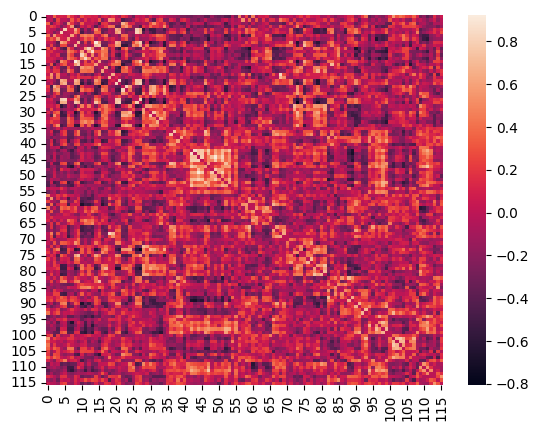

In [16]:
sns.heatmap(correlation_matrix)
plt.show()

In [17]:
flattened = correlation_matrix[np.triu_indices_from(correlation_matrix, k=1)]
threshold = np.percentile(flattened, 80)
threshold

0.21622910680240073

In [18]:
threshold_2 = np.percentile(correlation_matrix, 80)
threshold_2

0.2145169248084582

In [19]:
brain_network = np.zeros(shape=correlation_matrix.shape)
brain_network[np.where(correlation_matrix > threshold)] = 1

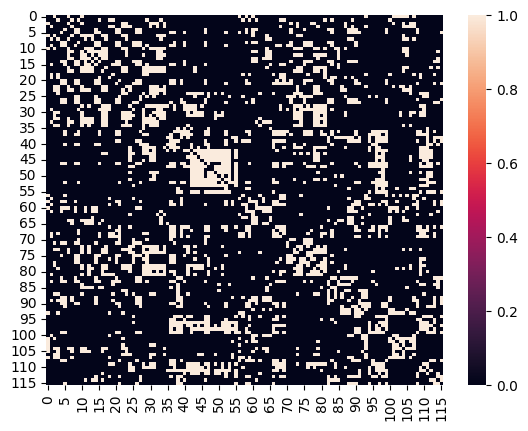

In [20]:
sns.heatmap(brain_network)
plt.show()

In [21]:
theirs = np.loadtxt("../data/lanciano_datasets_corr_thresh_80/male/asd/KKI_0050794.txt")
ours = brain_network

diff = theirs - ours

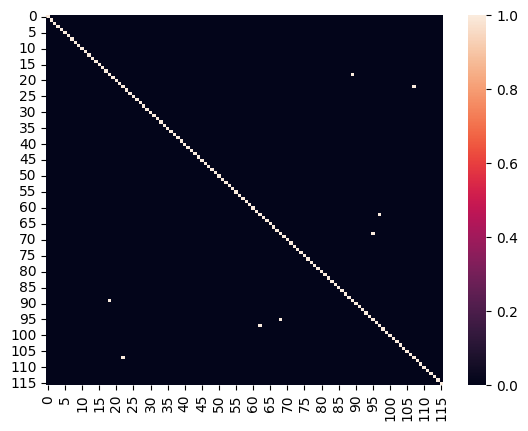

In [22]:
ax = sns.heatmap(diff)
plt.show()